# Realizado por Enrique Vázquez Iriarte

Importamos las librerias

In [2]:
#Importación de todas las librerías que vamos a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

#Ignoramos los warnings para tener una salida limpia
warnings.filterwarnings("ignore")

#Cargamos Wandb
import wandb

Convertimos el dataset a un DataFrame y mostramos los 5 primeros elementos.

In [3]:
iris = pd.read_csv("./data/Iris.csv")
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Ahora veremos las características principales del dataset:

In [4]:
iris.info() #Información general sobre filas y columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.describe() #Información sobre las estadísticas descriptivas

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris['Species'].value_counts() #Cantidad de registros por cada especie

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Visualización de los datos


Text(0.5, 1.0, 'Distribución del ancho de los pétalos (cm)')

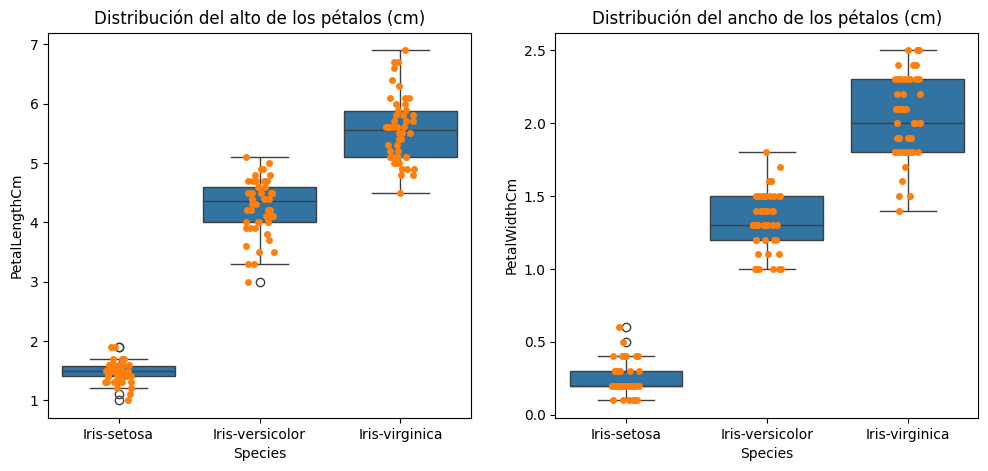

In [7]:
###PÉTALOS###
#Definimos los dos gráficos.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#PetalLengthCm:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris, ax=axes[0])
sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray", ax=axes[0])
axes[0].set_title("Distribución del alto de los pétalos (cm)")

#PetalWidthCm:
sns.boxplot(x="Species", y="PetalWidthCm", data=iris, ax=axes[1])
sns.stripplot(x="Species", y="PetalWidthCm", data=iris, jitter=True, edgecolor="gray", ax=axes[1])
axes[1].set_title("Distribución del ancho de los pétalos (cm)")


#Observamos el rango de largo y de ancho de los pétalos de cada especie,
# y los puntos naranjas representan cada muestra individual dentro del conjunto.

Text(0.5, 1.0, 'Distribución del ancho de los sépalos (cm)')

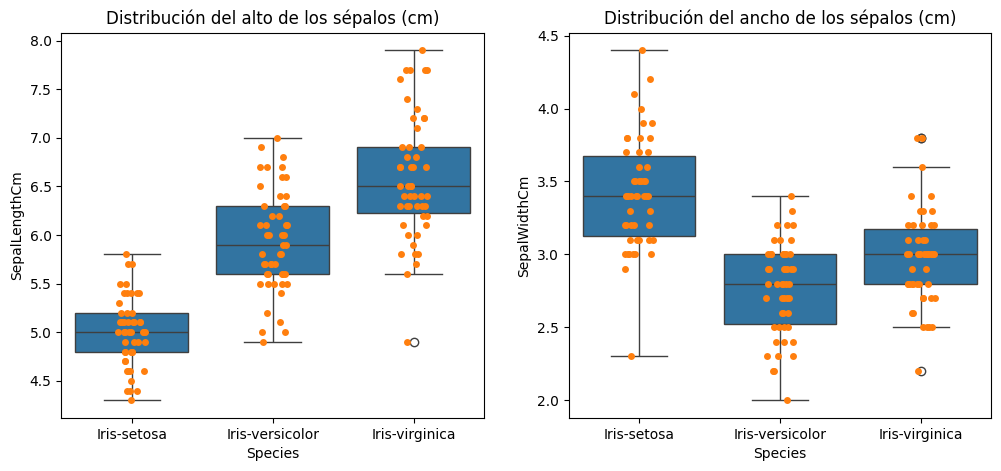

In [8]:
###SÉPALOS###
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax = sns.boxplot(x="Species", y="SepalLengthCm", data=iris, ax=axes[0])
ax = sns.stripplot(x="Species", y="SepalLengthCm", data=iris, jitter=True, edgecolor="gray", ax=axes[0])
axes[0].set_title("Distribución del alto de los sépalos (cm)")

sns.boxplot(x="Species", y="SepalWidthCm", data=iris, ax=axes[1])
sns.stripplot(x="Species", y="SepalWidthCm", data=iris, jitter=True, edgecolor="gray", ax=axes[1])
axes[1].set_title("Distribución del ancho de los sépalos (cm)")

#Observamos el rango de largo y de ancho de los sépalos de cada especie,
# y los puntos naranjas representan cada muestra individual dentro del conjunto.

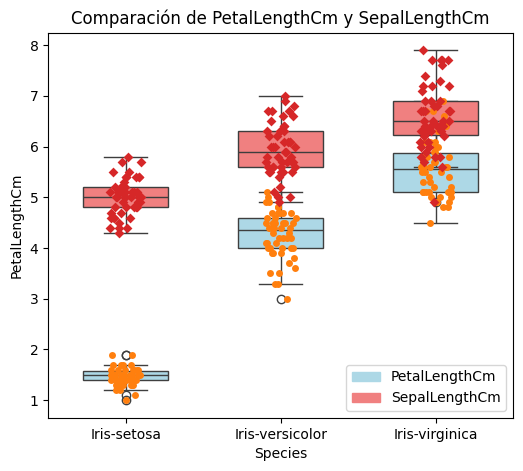

In [9]:
#Comparación del largo de los pétalos y sépalos#

plt.figure(figsize=(6, 5))
sns.boxplot(x="Species", y="PetalLengthCm", data=iris, width=0.55, boxprops={'facecolor':'lightblue'}, zorder=1)
sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="black", zorder=2)

sns.boxplot(x="Species", y="SepalLengthCm", data=iris, width=0.55, boxprops={'facecolor':'lightcoral'}, zorder=1)
sns.stripplot(x="Species", y="SepalLengthCm", data=iris, jitter=True, edgecolor="black", marker="D", zorder=3)

plt.title("Comparación de PetalLengthCm y SepalLengthCm")
petal_patch = mpatches.Patch(color="lightblue", label="PetalLengthCm")
sepal_patch = mpatches.Patch(color="lightcoral", label="SepalLengthCm")

plt.legend(handles=[petal_patch, sepal_patch], loc="lower right")



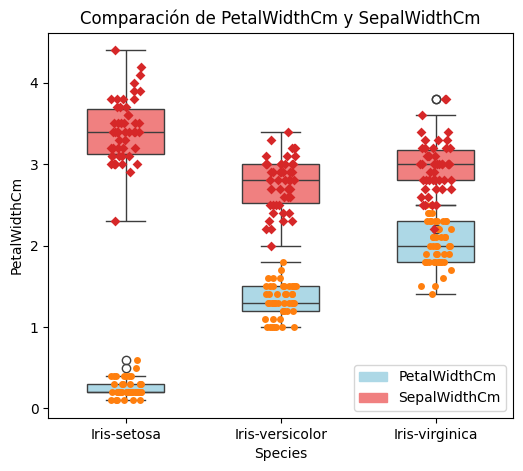

In [10]:
#Comparación del ancho de los pétalos y sépalos#

plt.figure(figsize=(6, 5))
sns.boxplot(x="Species", y="PetalWidthCm", data=iris, width=0.5, boxprops={'facecolor':'lightblue'}, zorder=1)
sns.stripplot(x="Species", y="PetalWidthCm", data=iris, jitter=True, edgecolor="black", zorder=2)

sns.boxplot(x="Species", y="SepalWidthCm", data=iris, width=0.5, boxprops={'facecolor':'lightcoral'}, zorder=1)
sns.stripplot(x="Species", y="SepalWidthCm", data=iris, jitter=True, edgecolor="black", marker="D", zorder=3)

plt.title("Comparación de PetalWidthCm y SepalWidthCm")
petal_patch = mpatches.Patch(color="lightblue", label="PetalWidthCm")
sepal_patch = mpatches.Patch(color="lightcoral", label="SepalWidthCm")

plt.legend(handles=[petal_patch, sepal_patch], loc="lower right")

# Hacemos el login en Wandb (consola: pip install wandb / wandb login)

In [11]:
#Declaro el grupo, el proyecto y el nombre de esta ejecución.
wandb.init(entity="enriquevaz-cei-myorg",project="Iris Dataset trabajo CEI", name="PCA")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: enriquevaz (enriquevaz-cei-myorg) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [12]:
#He creado otra variable del dataset, para que no se mezcle con la primera parte de visualización de datos.
irisdf = iris


In [13]:
#Eliminamos la columna "Species" del dataframe (el objetivo), y metemos el valor en la variable "y"
X = irisdf.drop("Species", axis=1)
y = irisdf["Species"]


In [14]:
#La columna Id no me interesa, asi que la borro.
if "Id" in X.columns:
    X = X.drop(columns=["Id"])

In [15]:
print("Número de columnas en X antes de PCA:", X.shape[1])

Número de columnas en X antes de PCA: 4


In [16]:
#Prepocesamiento: Escalamos los datos.     
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
#Añadimos los nombres de las columnas para el PCA
feature_names = X.columns.tolist()


In [18]:
#Definimos PCA con 2 componentes
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_scaled)


In [19]:
#Definimos los dos componentes principales
componentes_df = pd.DataFrame(pca.components_, columns=feature_names, index=["PC1", "PC2"])


In [20]:
print("Componentes principales:")
print(componentes_df)

print("Varianza por cada componente:")
print(pca.explained_variance_ratio_)

Componentes principales:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
PC1       0.522372     -0.263355       0.581254      0.565611
PC2       0.372318      0.925556       0.021095      0.065416
Varianza por cada componente:
[0.72770452 0.23030523]


In [21]:
#Registramos las métricas definidas previamente para enviarlas a wandb
wandb.log({
    "varianza_PC1": pca.explained_variance_ratio_[0],
    "varianza_PC2": pca.explained_variance_ratio_[1]
})


In [22]:
wandb.finish()

varianza_PC1,▁
varianza_PC2,▁
varianza_PC1,0.7277
varianza_PC2,0.23031
